In [1]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('dataset.csv')
#showing our initial dataframe here
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,1,2,2,4,1,2020-04-22,2020-04-18,...,2,2,2,2,2,1,1,99,99,97
1,OUTSIDE USMER,STATE,15,2,15,15,33,2,2020-05-18,2020-05-15,...,2,2,2,1,2,2,1,99,99,2
2,OUTSIDE USMER,STATE,2,1,2,2,2,1,2020-05-22,2020-05-19,...,2,2,1,2,2,1,1,99,99,97
3,OUTSIDE USMER,STATE,15,2,9,15,87,1,2020-06-05,2020-06-04,...,2,2,2,2,1,1,1,99,99,97
4,OUTSIDE USMER,IMSS,25,2,25,25,6,1,2020-04-22,2020-04-18,...,2,2,2,2,2,99,1,99,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,2,25,25,9,1,2020-06-02,2020-05-23,...,2,2,2,2,2,99,1,99,99,97
159789,USMER,SSA,22,1,22,22,12,2,2020-06-04,2020-06-02,...,2,2,2,2,2,2,1,99,99,2
159790,OUTSIDE USMER,SSA,12,2,12,12,50,1,2020-06-04,2020-06-03,...,2,2,1,2,2,1,1,99,99,97
159791,OUTSIDE USMER,IMSS,15,2,15,15,39,1,2020-06-04,2020-06-02,...,2,2,2,2,2,99,1,99,99,97


In [2]:
## Question 1

df = pd.read_excel('data_dictionary.xlsx')
dictionary = df.set_index('variable').T.to_dict()

for key, value in dictionary.items():
    for i in value.values():
        res = dict(item.split("=") for item in i.split(", "))
        dictionary[key] = res

dictionary = {outer_k.upper(): {inner_k.replace(' ', ''): inner_v for inner_k, inner_v in outer_v.items()} for outer_k, outer_v in dictionary.items()}

for key, value in dictionary.items():
    dataframe[key]= dataframe[key].astype(str)
    dataframe.replace({key: dictionary[key]}, inplace=True)
    
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,...,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,...,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [3]:
#saving the q1 dataframe for displaying onto streamlit
pd.DataFrame.to_csv(dataframe, 'q1.csv')

### Question 2

<AxesSubplot:ylabel='Frequency'>

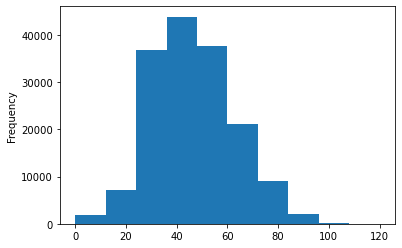

In [8]:
## Question 2
dataframe["AGE"].plot(kind="hist", bins=10)

### Question 3

In [21]:
## Question 3


### Question 4

In [20]:
## Question 4
filter = dataframe['INTUBATED'] == 'YES'
dataframe[filter].shape[0]

4828

### Question 5

In [1]:
## Question 5

### Question 6

In [80]:
## Question 6
filter = dataframe['DATE_OF_DEATH'].notnull()
dataframe.loc[filter, 'DIABETES':'OTHER_DISEASE'][dataframe == 'YES'].count().sort_values(ascending=False).idxmax()


'HYPERTENSION'

### Question 7

In [3]:
## Question 7
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [32]:
df1 = dataframe.copy()
df1

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,...,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,...,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [33]:
filter = (df1['ICU'].str.contains('UNKNOWN') | df1['ICU'].str.contains('DOES NOT APPLY'))
df1.drop(df1.index[filter], inplace=True)

In [34]:
df1['ICU'] = np.where(df1['ICU'] == 'YES', '1', df1['ICU'])
df1['ICU'] = np.where(df1['ICU'] == 'NO', '0', df1['ICU'])
df1['ICU'] = df1['ICU'].astype(str).astype(int)

In [35]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
BIRTHPLACE_LOCATION        int64
PATIENT_LOCATION           int64
MUNICIPALITY               int64
HOSPITALIZED              object
ADMISSION DATE            object
DATE_OF_FIRST_SYMPTOM     object
DATE_OF_DEATH             object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
COUNTRY OF

In [36]:
df1['ICU'].value_counts()

0    46510
1     4654
Name: ICU, dtype: int64

In [37]:
df1.shape

(51164, 32)

In [38]:
def split_date(df1):
    return df1.join(
        df1['ADMISSION DATE']
        # Split date
        .str.split('-', expand=True)
        .rename(columns={0: 'ADMISSION_YEAR', 1: 'ADMISSION_MONTH', 2: 'ADMISSION_DATE'})
    )

df1 = df1.pipe(split_date).head()

In [39]:
df1.drop(['ADMISSION DATE', 'BIRTHPLACE_LOCATION', 'DATE_OF_FIRST_SYMPTOM', 'DATE_OF_DEATH', 'MUNICIPALITY', 'COUNTRY OF ORIGIN'], axis=1, inplace=True)
df1.shape

(5, 29)

In [40]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
PATIENT_LOCATION           int64
HOSPITALIZED              object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
ICU                        int32
ADMISSION_YEAR            object
ADMISSION_MONTH           object
ADMISSION_DATE            object
dtype: object

In [41]:
col_list = [col for col in df1.columns.tolist() if df1[col].dtype.name == "object"]
df_oh = df1[col_list]
df1 = df1.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df1 = pd.concat([df1, df_oh], axis=1)
df1.head()

,TREATMENT_LOCATION,PATIENT_LOCATION,AGE,ICU,ORIGIN_OUTSIDE USMER,SECTOR_IMSS,SECTOR_STATE,SEX_ Female,SEX_ Male,HOSPITALIZED_YES,...,OUTCOME_POSITIVE,MIGRANT_UNKNOWN,ADMISSION_YEAR_2020,ADMISSION_MONTH_04,ADMISSION_MONTH_05,ADMISSION_MONTH_06,ADMISSION_DATE_04,ADMISSION_DATE_05,ADMISSION_DATE_08,ADMISSION_DATE_18
1,15,15,35,0,1,0,1,0,1,1,...,1,1,1,0,1,0,0,0,0,1
5,15,15,79,0,1,1,0,1,0,1,...,1,1,1,1,0,0,0,0,0,1
6,15,15,55,0,1,0,1,0,1,1,...,1,1,1,0,1,0,0,1,0,0
7,15,15,66,0,1,0,1,1,0,1,...,1,1,1,0,1,0,0,0,1,0
14,15,15,43,0,1,0,1,1,0,1,...,1,1,1,0,0,1,1,0,0,0


In [42]:
y = df1.ICU
X = df1.drop("ICU", 1)
colnames = X.columns

In [43]:
for i in colnames:
    print(i)

TREATMENT_LOCATION
PATIENT_LOCATION
AGE
ORIGIN_OUTSIDE USMER
SECTOR_IMSS
SECTOR_STATE
SEX_ Female
SEX_ Male
HOSPITALIZED_YES
INTUBATED_NO
PNEUMONIA_NO
PNEUMONIA_YES
NATIONALITY_MEXICAN
PREGNANCY_DOES NOT APPLY
PREGNANCY_NO
SPEAKS_NATIVE_LANGUAGE_NO
DIABETES_NO
DIABETES_YES
COPD_NO
COPD_YES
ASTHMA_NO
INMUSUPR_NO
INMUSUPR_YES
HYPERTENSION_NO
HYPERTENSION_YES
OTHER_DISEASE_NO
CARDIOVASCULAR_NO
CARDIOVASCULAR_YES
OBESITY_NO
OBESITY_YES
CHRONIC_KIDNEY_NO
CHRONIC_KIDNEY_YES
TOBACCO_NO
TOBACCO_YES
ANOTHER CASE_NO
ANOTHER CASE_UNKNOWN
ANOTHER CASE_YES
OUTCOME_POSITIVE
MIGRANT_UNKNOWN
ADMISSION_YEAR_2020
ADMISSION_MONTH_04
ADMISSION_MONTH_05
ADMISSION_MONTH_06
ADMISSION_DATE_04
ADMISSION_DATE_05
ADMISSION_DATE_08
ADMISSION_DATE_18


### Question 8

In [67]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)

feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

In [68]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=135, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x25F495E8240),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x25F495E8240)

In [72]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [73]:
print('---------Top 20----------')
display(boruta_score.head(20))

---------Top 20----------


,Features,Score
0,TREATMENT_LOCATION,1.0
170,ANOTHER CASE_UNKNOWN,1.0
1,PATIENT_LOCATION,1.0
126,INTUBATED_NO,1.0
127,INTUBATED_YES,1.0
161,OBESITY_NO,1.0
162,OBESITY_YES,1.0
129,PNEUMONIA_YES,1.0
169,ANOTHER CASE_NO,1.0
19,SEX_ Male,1.0


Text(0.5, 1.0, 'Boruta Top 20 Features')

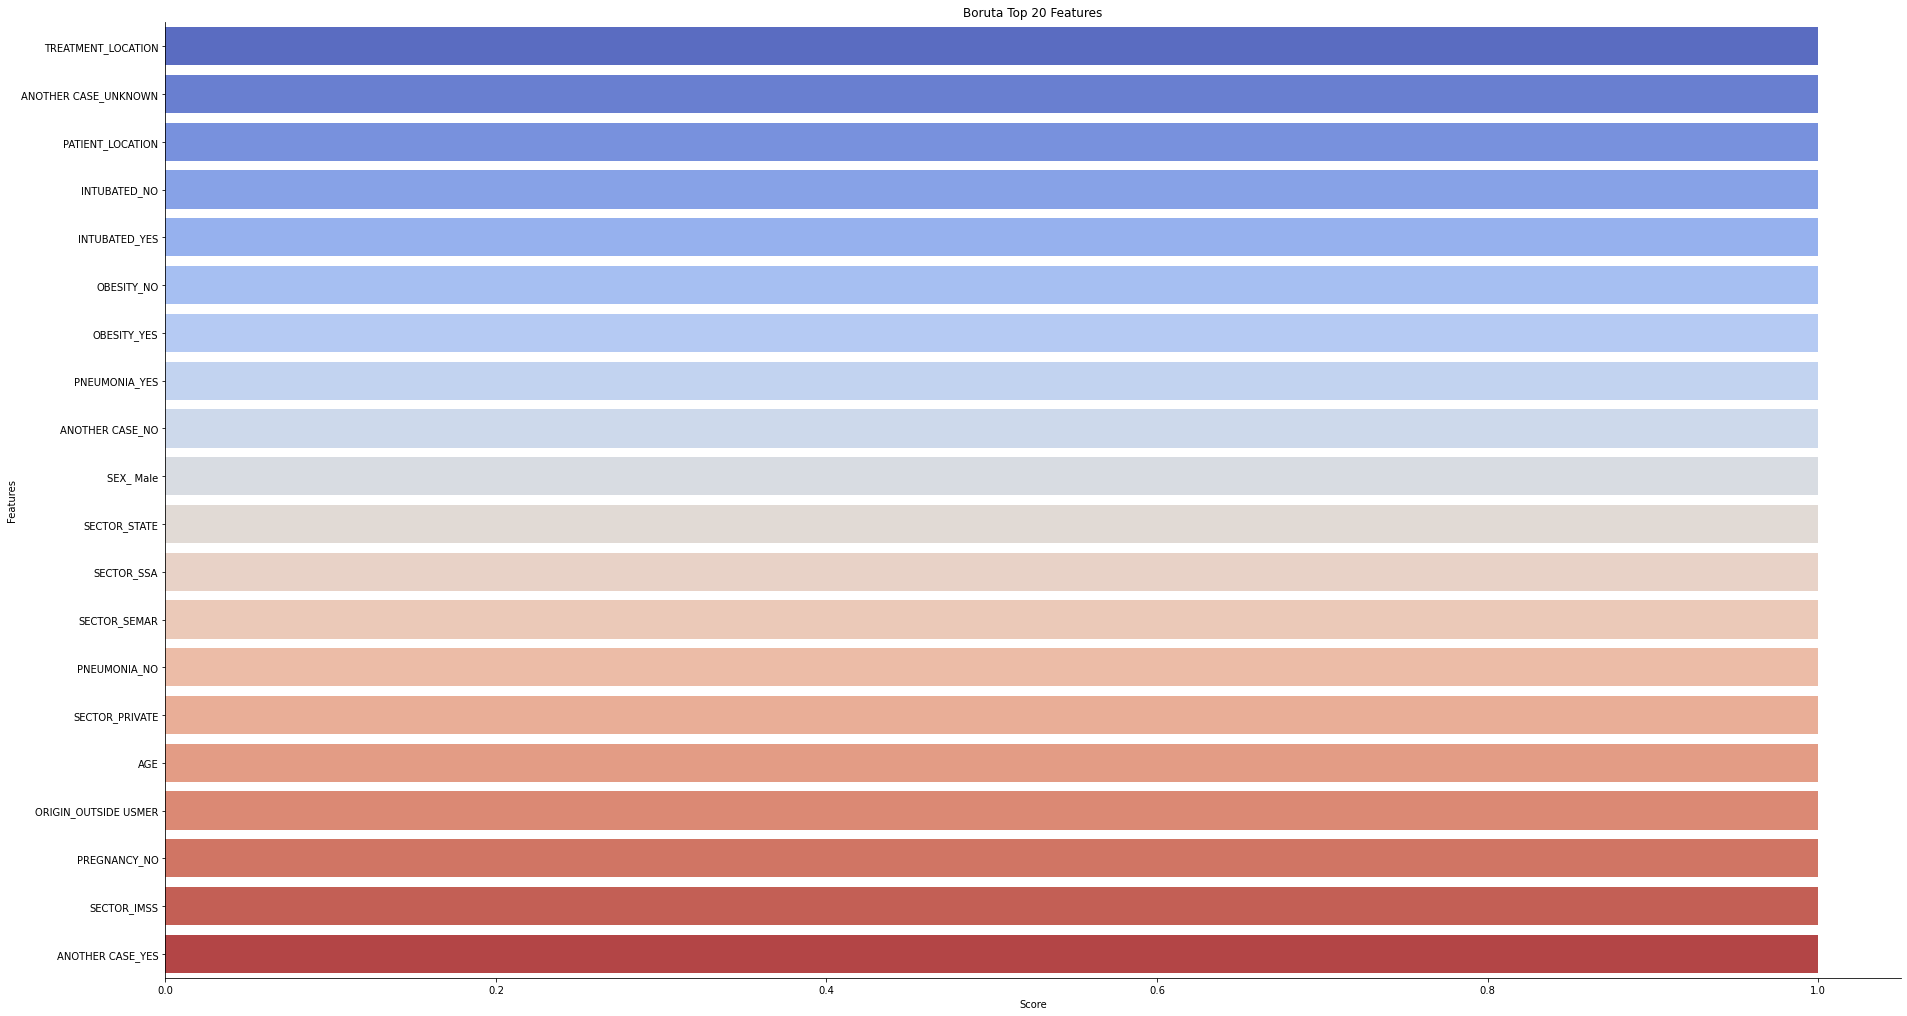

In [74]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 20 Features")

In [77]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X, y)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [78]:
rfe.fit(X, y)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [79]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

Text(0.5, 1.0, 'RFE Top 20 Features')

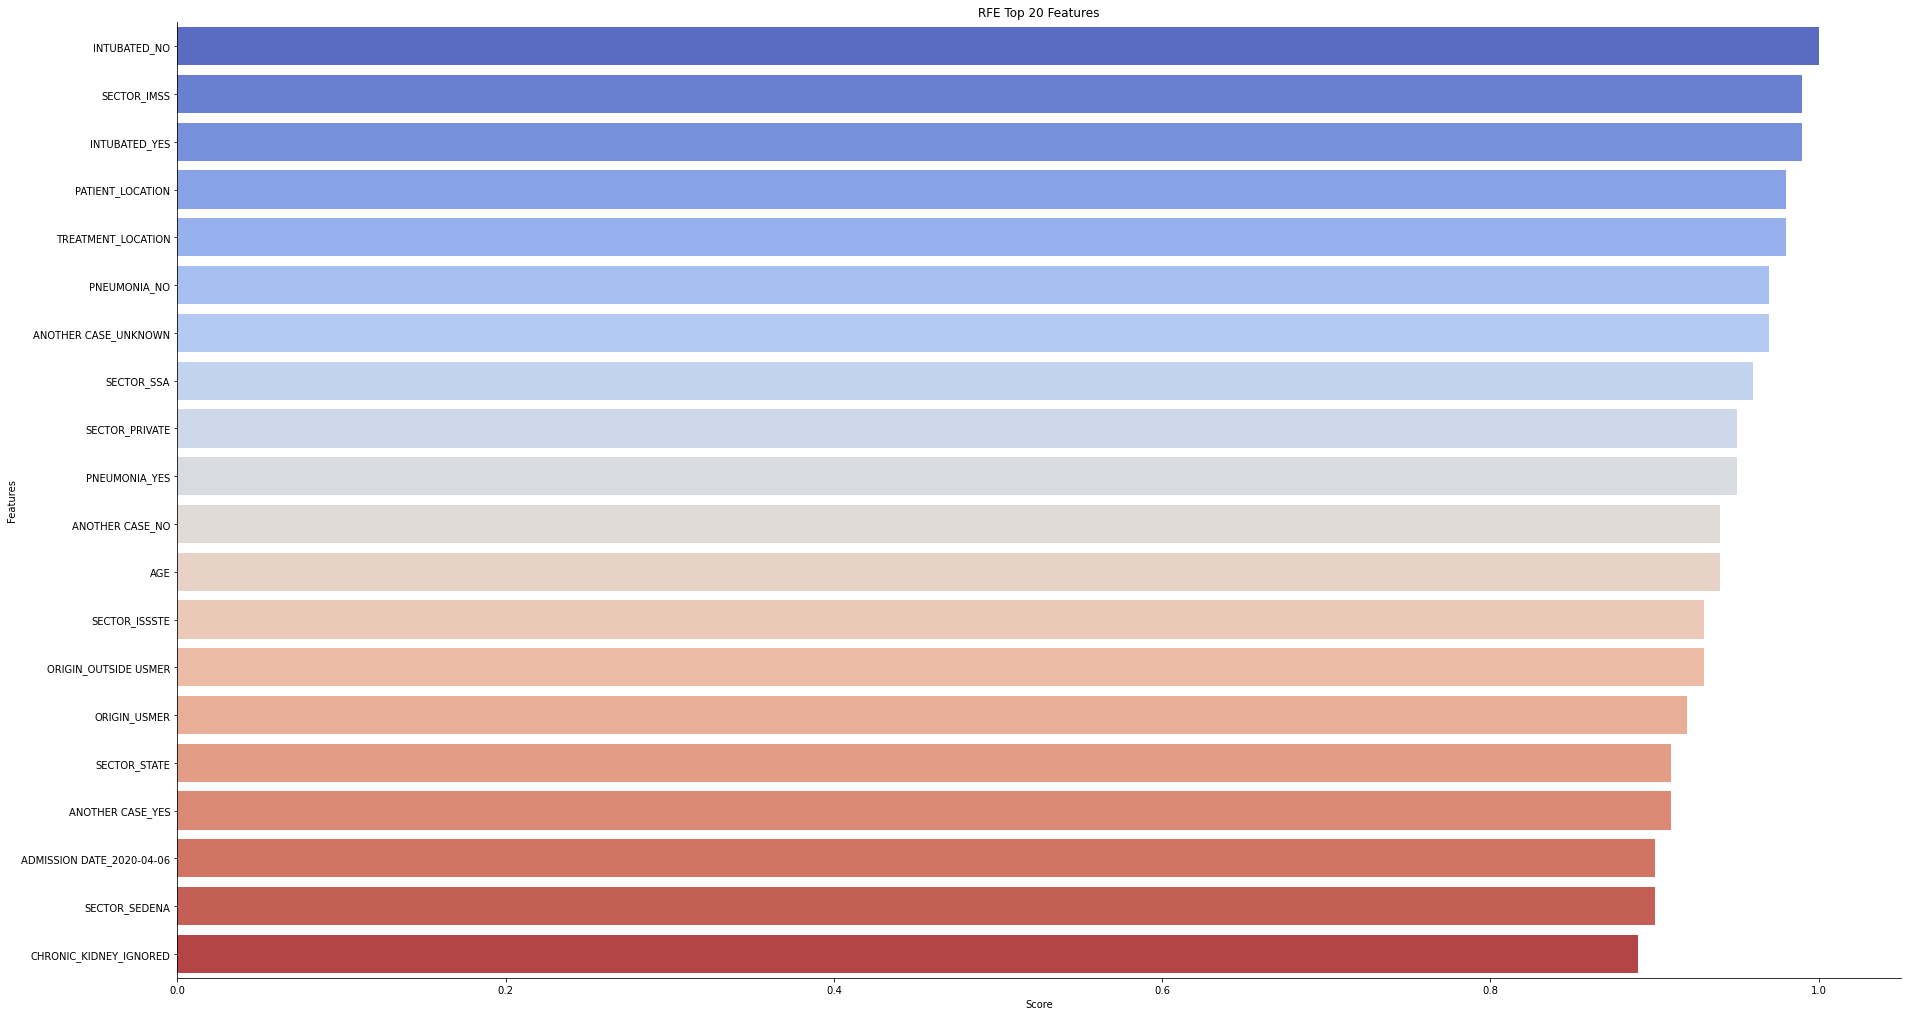

In [80]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top 20 Features")

### Question 10

In [4]:
## Question 10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [5]:
df1 = dataframe.copy()
df1

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,...,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,...,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [6]:
filter = (df1['ICU'].str.contains('UNKNOWN') | df1['ICU'].str.contains('DOES NOT APPLY'))
df1.drop(df1.index[filter], inplace=True)

In [7]:
df1['ICU'] = np.where(df1['ICU'] == 'YES', '1', df1['ICU'])
df1['ICU'] = np.where(df1['ICU'] == 'NO', '0', df1['ICU'])
df1['ICU'] = df1['ICU'].astype(str).astype(int)

In [8]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
BIRTHPLACE_LOCATION        int64
PATIENT_LOCATION           int64
MUNICIPALITY               int64
HOSPITALIZED              object
ADMISSION DATE            object
DATE_OF_FIRST_SYMPTOM     object
DATE_OF_DEATH             object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
COUNTRY OF

In [9]:
#df1['ICU'] = np.where(df1['ICU'] == 'DOES NOT APPLY', 'NO', df1['ICU'])
df1['ICU'].value_counts()

0    46510
1     4654
Name: ICU, dtype: int64

In [10]:
df_X = df1.drop('ICU', axis=1)
y = df1['ICU']

In [11]:
X = pd.get_dummies(df_X, drop_first=True)

In [12]:
X.head()

,TREATMENT_LOCATION,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,AGE,ORIGIN_USMER,SECTOR_DIF,SECTOR_IMSS,SECTOR_ISSSTE,SECTOR_MUNICIPAL,...,COUNTRY OF ORIGIN_Cuba,COUNTRY OF ORIGIN_Egipto,COUNTRY OF ORIGIN_El Salvador,COUNTRY OF ORIGIN_Estados Unidos de América,COUNTRY OF ORIGIN_Ghana,COUNTRY OF ORIGIN_Grecia,COUNTRY OF ORIGIN_Guatemala,COUNTRY OF ORIGIN_Haití,COUNTRY OF ORIGIN_Otro,COUNTRY OF ORIGIN_República de Honduras
1,15,15,15,33,35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15,15,15,99,79,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,9,15,20,55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15,15,15,19,66,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,15,15,15,106,43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [15]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.739
Accuracy on test set: 0.735


In [16]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[10624  3379]
 [  693   654]]
**********************
Mjority TN=  10624
Mjority FP= 3379
Mjority FN=  693
Mjority TP=  654
**********************
Precision= 0.16
Recall= 0.49
F1= 0.24
Accuracy= 0.73


In [17]:
#AUC
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

AUC: 0.67


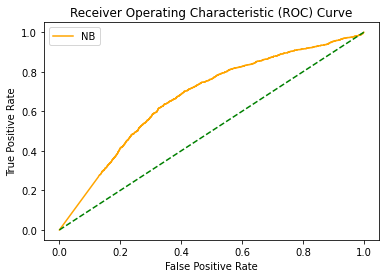

In [18]:
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 11

In [19]:
# Question 11
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [22]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.682
Accuracy on test set: 0.678


In [23]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[9246 4757]
 [ 185 1162]]
**********************
Mjority TN=  9246
Mjority FP= 4757
Mjority FN=  185
Mjority TP=  1162
**********************
Precision= 0.20
Recall= 0.86
F1= 0.32
Accuracy= 0.68


In [24]:
#AUC
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]

auc_RF= roc_auc_score(y_test, prob_RF)
print('AUC: %.2f' % auc_RF)

AUC: 0.86


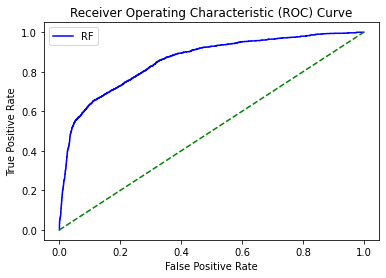

In [26]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prob_RF) 

plt.plot(fpr_RF, tpr_RF, color='blue', label='RF') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

### Question 13

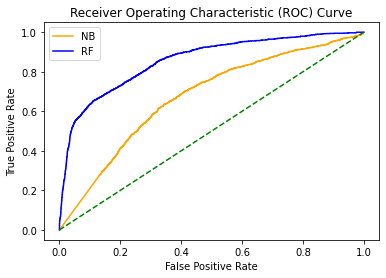

In [27]:
# Question 13
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB')
plt.plot(fpr_RF, tpr_RF, color='blue', label='RF')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()